In [12]:

from graphviz import Digraph
from micrograd.engine import Value

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    nodes, edges = trace(root)
    dot = Digraph(format="svg", graph_attr={'rankdir': 'LR'}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %4f }" % (n.label,n.data,n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot



class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data, (self,other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self,other), "*")

In [20]:
# inputs
x1 = Value(2.0, label="x1")
x2= Value(0.0, label="x2")

# weights
w1  = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

#Bias
b = Value(6.7, label="b")

x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"
x1w1_x2w2 = x1w1 + x2w2 ; x1w1_x2w2.label = "x1w1_x2w2"

n = x1w1_x2w2 + b; n.label = "n"



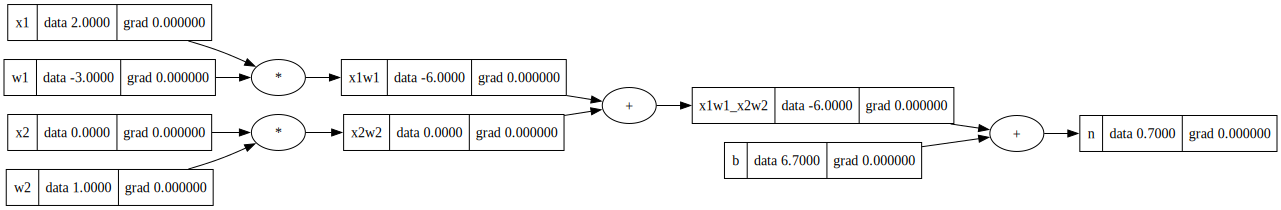

In [21]:
draw_dot(n)

In [50]:
my_list = [ i for i in range(100, 1000, 50)]

In [51]:
my_list

[100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950]